### Installing libraries

In [3]:
import pandas as pd 
import numpy as np 
import os as os
from scipy.stats import percentileofscore
import scipy as sc
from fastkde.fastKDE import pdf
from sklearn.cluster import MiniBatchKMeans
import warnings
import pickle

## User defined function

In [2]:
def get_pdf(data):
    y, x = pdf(data)
    return x, y

def k_means_fast_result(all_ratio):
    kmeans_fast = MiniBatchKMeans(n_clusters=2,
                            batch_size=256*7,
                           max_iter=10)
    
    warnings.filterwarnings("ignore")
    kmeans_fast.fit(all_ratio.reshape(-1,1))
    y_kmeans_fast = kmeans_fast.predict(all_ratio.reshape(-1,1))
    print(np.min(all_ratio[y_kmeans_fast == 0]),"-",np.max(all_ratio[y_kmeans_fast == 0] ) )
    return()  

### Locations:

In [4]:

save_folder =  "D:/Samagra/KO/Recommendations engine/IVRS transformations/"
folder_loc = "D:/Samagra/KO/Ama_krushi_data/"
file_list = os.listdir(folder_loc)
file_list.reverse()

### Collating all the unqiue content names:

Saving all the content names by pulling unnique content names from all the Excel files 

In [ ]:
all_files_content =  pd.DataFrame(columns= ['file_name','pushcall_id'])


for file_name in file_list:
    print(file_name)
    df = pd.read_csv(folder_loc+file_name)
    df = df.loc[~df.pushcall_length.isna(),:]
    unique_content_names = df.pushcall_id.unique()
    content_df = pd.DataFrame(unique_content_names,columns = ['pushcall_id'] )
    content_df['file_name']= file_name
    all_files_content =  all_files_content.append(content_df,ignore_index= True)
    
all_files_content.to_csv(save_folder + 'content_names_in_files.csv',index=False)

### Content durations and language 

In [25]:
all_files_content_meta =  pd.DataFrame(columns= ['pushcall_id','pushcall_length','call_language'])
for file_name in file_list:
    print(file_name)
    df = pd.read_csv(folder_loc+file_name)
    df = df.loc[~df.pushcall_length.isna(),:]
    unique_content_meta = df[['pushcall_id','pushcall_length','call_language']].drop_duplicates()
    all_files_content_meta =  pd.concat((all_files_content_meta,unique_content_meta),axis = 0,ignore_index= True)


22-04-30_April_22.csv


C:\Users\gauta\AppData\Local\Temp\ipykernel_18400\3036961833.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder_loc+file_name)


22-03-31_March_20-31.csv


C:\Users\gauta\AppData\Local\Temp\ipykernel_18400\3036961833.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder_loc+file_name)


22-03-20_March_10-20.csv
22-03-10_March_1-10.csv
22-02-30_Feb_22_3.csv
22-02-20_Feb_22_2.csv
22-02-10_Feb_22_1.csv
22-01-30_Jan_20-30.csv
22-01-20_Jan_11-20.csv


C:\Users\gauta\AppData\Local\Temp\ipykernel_18400\3036961833.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder_loc+file_name)


22-01-11_Jan_1-10.csv


C:\Users\gauta\AppData\Local\Temp\ipykernel_18400\3036961833.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder_loc+file_name)


21-12-31_Dec_21_21-31.csv
21-12-31_Dec_21_11-20.csv
21-12-10_Dec_21_1.csv


C:\Users\gauta\AppData\Local\Temp\ipykernel_18400\3036961833.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder_loc+file_name)


21-11-30_Nov_21_21-30.csv
21-11-20_Nov_21_11-20.csv
21-11-10_Nov_21_01-10.csv
21-10-30_Oct_21_3.csv
21-10-20_Oct_21_2.csv
21-10-10_Oct_21_1.csv
21-09-30_Sept_21_3.csv
21-09-20_Sept_21_2.csv
21-09-10_Sept_21_1.csv
21-08-30_August_21_3.csv


C:\Users\gauta\AppData\Local\Temp\ipykernel_18400\3036961833.py:4: DtypeWarning: Columns (6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder_loc+file_name)


21-08-20_August_21_2.csv
21-08-10_August_21_1.csv


In [26]:
all_files_content_meta = all_files_content_meta.drop_duplicates()
all_files_content_meta.to_csv(save_folder + 'content_metadata_1yr.csv',index=False)

### Collating the engagement ratios over the past year: 

In [ ]:
all_ratio = np.array([])
for file_name in file_list:
    print(file_name)
    df = pd.read_csv(folder_loc+file_name)
    df = df.loc[~df.pushcall_length.isna(),:]
    df_group = df.groupby(['pushcall_id','number','advisory_type','pushcall_length']).duration.agg( 'max').reset_index()
    ratio =  df_group.duration/df_group.pushcall_length
    all_ratio = np.append(all_ratio,ratio)
all_ratio1 = all_ratio
all_ratio = all_ratio[~np.isnan(all_ratio)]

We have taken the maximum duration of a call for a user-item. That is, if a the same content is sent to the same user multiple times, we take the maximum duration of the call only. 
This is considering that low durations can happen because of several operational reasons but a high duration call is a success. Hence, if the same content is sent multiple times and even if once they listen for a longer duration, the content interactions is considered a success. 

### Collating all the phone numbers :

In [16]:
all_numbers = np.array([])
for file_name in file_list:
    print(file_name)
    df = pd.read_csv(folder_loc+file_name)
    unique_numbers = df.number.unique()
    all_numbers = np.append(all_numbers,unique_numbers)
    all_numbers = np.unique(all_numbers)

22-04-30_April_22.csv
22-03-31_March_20-31.csv
22-03-20_March_10-20.csv
22-03-10_March_1-10.csv
22-02-30_Feb_22_3.csv
22-02-20_Feb_22_2.csv
22-02-10_Feb_22_1.csv
22-01-30_Jan_20-30.csv
22-01-20_Jan_11-20.csv
22-01-11_Jan_1-10.csv
21-12-31_Dec_21_21-31.csv
21-12-31_Dec_21_11-20.csv
21-12-10_Dec_21_1.csv
21-11-30_Nov_21_21-30.csv
21-11-20_Nov_21_11-20.csv
21-11-10_Nov_21_01-10.csv
21-10-30_Oct_21_3.csv
21-10-20_Oct_21_2.csv
21-10-10_Oct_21_1.csv
21-09-30_Sept_21_3.csv
21-09-20_Sept_21_2.csv
21-09-10_Sept_21_1.csv
21-08-30_August_21_3.csv
21-08-20_August_21_2.csv
21-08-10_August_21_1.csv


In [18]:
pd.DataFrame(all_numbers,columns = ['phone_number']).to_csv(save_folder + 'IVRS_phone_numbers.csv',index=False)

### Reading pickle files if already loaded:

In [6]:
with open('all_ratio.pkl', 'rb') as handle:
    all_ratio = pickle.load(handle)
all_ratio= all_ratio[0]

### Clustering to find the boundary of the different kinds of users: 

Looking at the distribution of engagement ratio:  

array([[<AxesSubplot:title={'center':'Engagement ratio histogram'}>]],
      dtype=object)

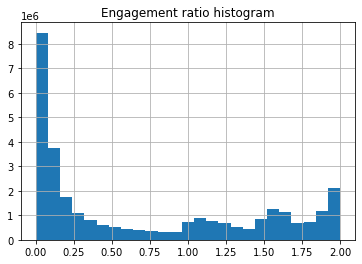

In [13]:
pd.DataFrame(all_ratio,columns = ['Engagement ratio histogram']).hist( bins = 25)

We see that there is a spike from near just before 1 onwards

We can cluster and see if we can get 2 separate groups in accordance with the above graph. 

In [10]:
k_means_fast_result(all_ratio)

0.0 - 0.858034321372855


()

We see that we have two clusters :
- Cluster 1 :  Engagament ratio from 0 to 0.86
- Cluster 2 :  Engagement ratio from 0.86 to 2

Checking the percentile for this ratio: 

In [11]:
percentileofscore(all_ratio,0.858034321372855 )

59.748981863551876

We can see that  40% of the interactions are considered a success and the rest not as a success. 